objective:

1.we have to classify the new patient whether he belongs to survived or Died based on the given following dataset.

2.status1 belongs to the type of patients where those patients survived for more than five years and status2 for the patients who didn't survive for more than 5 years.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hm_df=pd.read_csv('haberman.csv')
hm_df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [13]:
hm_df['status'] = hm_df['status'].replace([1,2],['survived', 'Died'])

In [11]:
hm_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [14]:
hm_df.status.value_counts()

survived    225
Died         81
Name: status, dtype: int64

observation:

By seeing above values we came to know that patients under survived,Died category are 225,81 respectively.

# BIVARAITE(2-D SCATTER PLOT,PAIR-PLOT)

BIVARAITE - Needs two variables

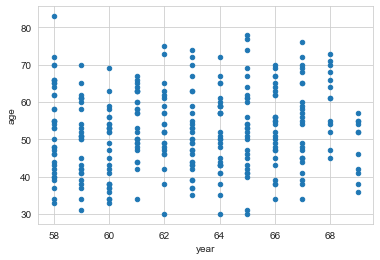

In [15]:
hm_df.plot(kind='scatter',x='year',y='age')
plt.show()

observation:

we are unable to distinguish between survived and Died patients.

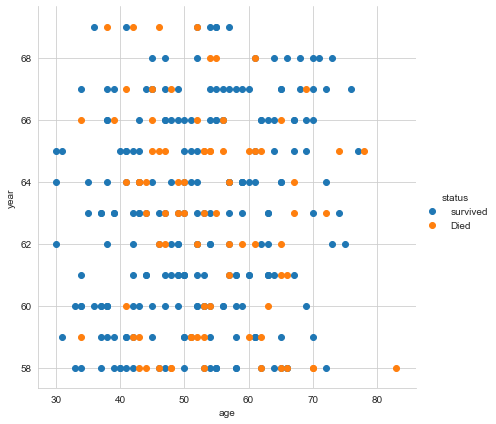

In [16]:
import warnings
warnings.filterwarnings('ignore') #used to ignore warnings while executing
sns.set_style('whitegrid');
sns.FacetGrid(hm_df,hue='status',size=6)\
   .map(plt.scatter,'age','year')\
   .add_legend()
plt.show()

observation:

1)Difficult to say more information regarding to the survival status from the plot.

2)Majority of operations are performed on people of age between 40-66.

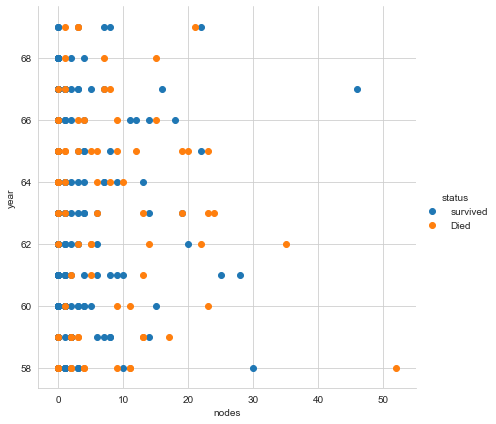

In [17]:
sns.set_style('whitegrid');
sns.FacetGrid(hm_df,hue='status',size=6)\
   .map(plt.scatter,'nodes','year')\
   .add_legend()
plt.show()

observation:

since all points are overlapping it is difficult to say about status. More operations are performed in between 1960-66.  

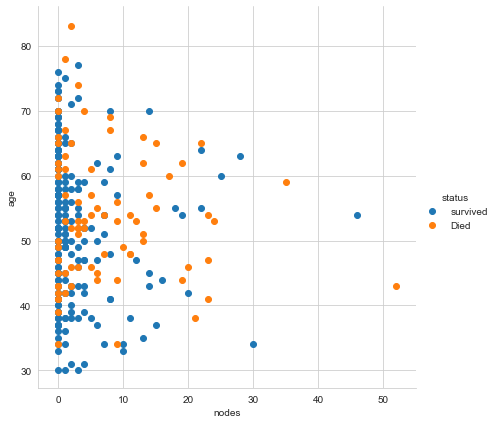

In [18]:
sns.set_style('whitegrid');
sns.FacetGrid(hm_df,hue='status',size=6)\
   .map(plt.scatter,'nodes','age')\
   .add_legend()
plt.show()

Observation:


We can observe that more data points are concentrated at node 0.

# PAIR-PLOT

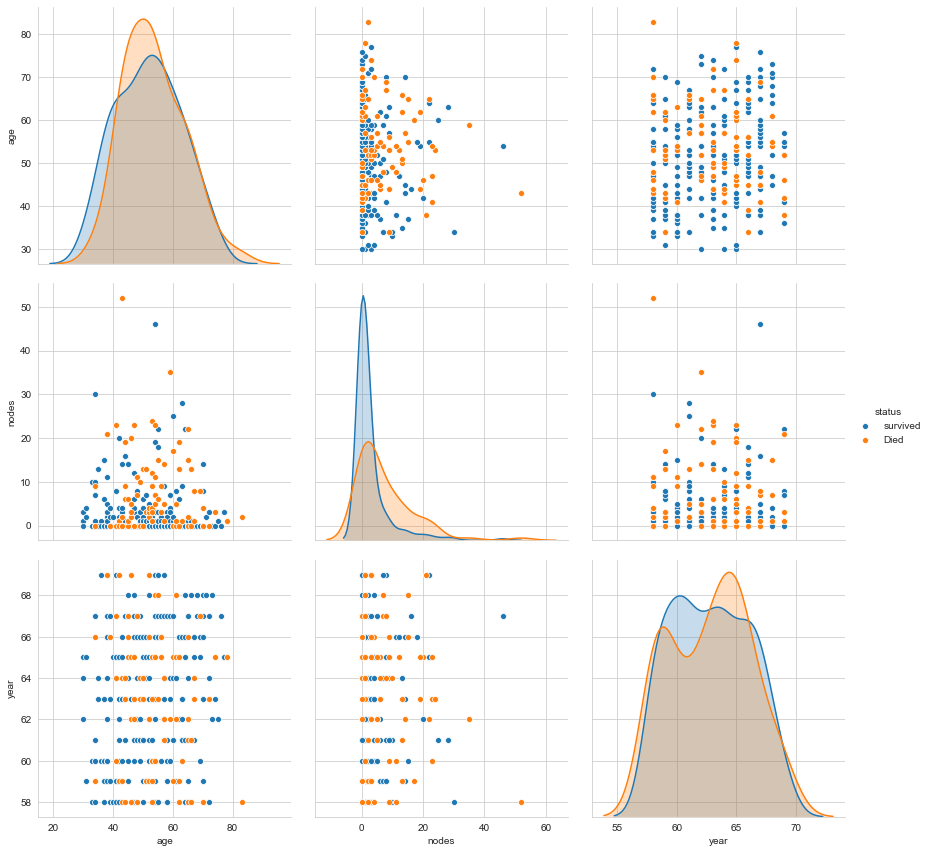

In [19]:
plt.close()
sns.set_style('whitegrid');
sns.pairplot(hm_df,hue='status',vars=['age','nodes','year'],size=4)
plt.show()

observations:

1.We are not getting any extra information about the status by using this plot.

# UNIVARAITE ANALYSIS

Univaraite - Can be generated using single variable

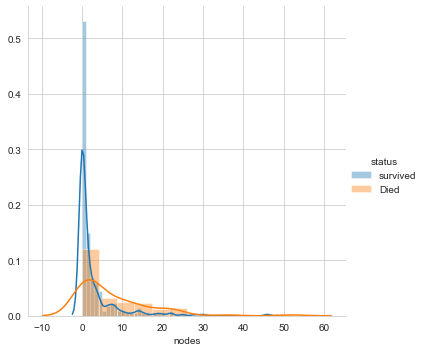

In [51]:
warnings.filterwarnings('ignore')
sns.FacetGrid(hm_df,hue='status',size=5)\
   .map(sns.distplot,'nodes')\
   .add_legend()
plt.show()

observation:

We found more overlapping in the histogram but one thing is that as the nodes count increasing we can see that Survived people density is decreasing and there is a increase in Died people  density.

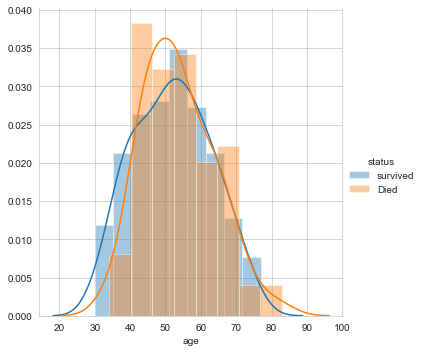

In [52]:
warnings.filterwarnings('ignore')
sns.FacetGrid(hm_df,hue='status',size=5)\
   .map(sns.distplot,'age')\
   .add_legend()
plt.show()

observation:

1)From 30-35 age group only survived patients are present. Survived patients concentration is more from 30-40 when compared to Died.

2)only Died status patients are present after 70 years of age.

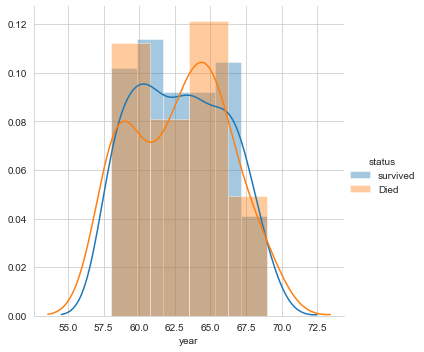

In [53]:
warnings.filterwarnings('ignore')
sns.FacetGrid(hm_df,hue='status',size=5)\
   .map(sns.distplot,'year')\
   .add_legend()
plt.show()

observation:

we can't get any clue of status since there is more overlapping.

More concentration of Died class in between 1963-66.

# BOXPLOT

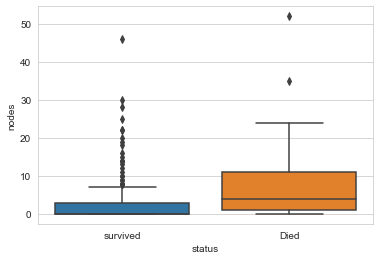

In [32]:
sns.boxplot(x='status',y='nodes',data=hm_df)
plt.show()

observation:

Patients who have nodes zero are mostly found in survived whereas patients having (4-5)nodes are mostly in Died.

[]

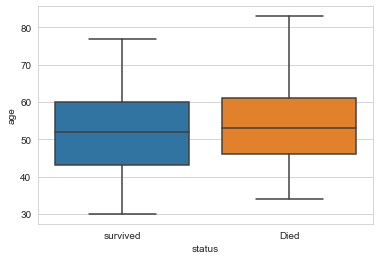

In [33]:
sns.boxplot(x='status',y='age',data=hm_df)
plt.plot()

observation:

Almost same mean in status1 and status2 so it's hard to find out the patients of differnet categories

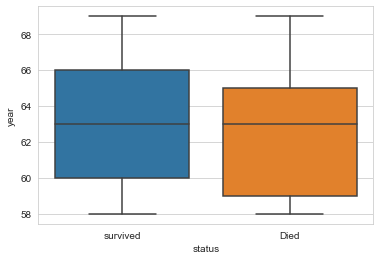

In [34]:
sns.boxplot(x='status',y='year',data=hm_df)
plt.show()

observation:

same like age groups, hard to distinguish the patients from status1 to status2

# VIOLIN PLOT

[]

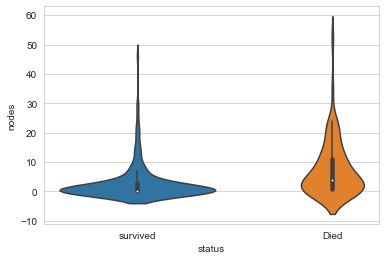

In [35]:
sns.violinplot(x='status',y='nodes',data=hm_df)
plt.plot()

[]

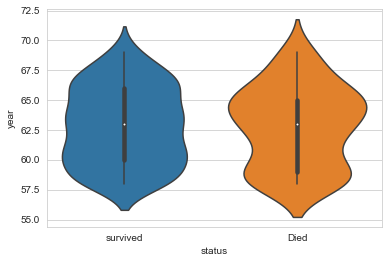

In [36]:
sns.violinplot(x='status',y='year',data=hm_df)
plt.plot()

[]

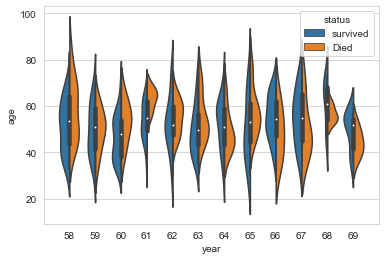

In [26]:
sns.violinplot(x='year',y='age',data=hm_df, hue= 'status', split = True )
plt.plot()

In [29]:
hm_1=hm_df[hm_df['status']=='survived']
hm_2=hm_df[hm_df['status']=='Died']

# MEAN,VARIANCE,STANDARD DEVIATION

In [30]:
import numpy as np
print('Means')
print(np.mean(hm_1))
print(np.mean(hm_2))

Means
age      52.017778
year     62.862222
nodes     2.791111
dtype: float64
age      53.679012
year     62.827160
nodes     7.456790
dtype: float64


In [31]:
import numpy as np
print("standard deviation")
print(np.std(hm_1['nodes']))
print(np.std(hm_2['nodes']))

standard deviation
5.857258449412138
9.128776076761635


In [32]:
import numpy as np
print(np.median(hm_1['nodes']))
print(np.median(hm_2['nodes']))

0.0
4.0


Final observation:
    
1.More patients having age around 52 are in survived category whereas having age around 53 are in Died category.

2.By using nodes we examined more data.

3.patients having an 0 nodes are mostly in survived category and having more than 1 are in Died category.

4.As the more part of age and year are in overlapping we cannot tell moreinformation by using them.

# Median, Percentile, Quantile

Percentile will tell us what percentage of points are less than that percentile and how many points are more than that percentile

In [50]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hm_1["nodes"]))
#Median with an outlier
print(np.median(np.append(hm_1["nodes"],50))); #median is nothing but 50th percentile
print(np.median(hm_2["nodes"]))

print("\nQuantiles:")
print(np.percentile(hm_1["nodes"],np.arange(0, 100, 25))) #(0th,25th,50th,75th)
print(np.percentile(hm_2["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(hm_1["nodes"],90))
print(np.percentile(hm_2["nodes"],90))

# try with other features


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0
